1. Data Exploration and Processing:
. Importing data
. Reading dataframe
. Check the shape of the dataframe
. Datatype of each column
. Missing value detection
. Checking duplicate values in the dataset

In [1]:
import pandas as pd
aerofit_data = pd.read_csv('aerofit_treadmill_data.csv')

In [13]:
print(aerofit_data.head())  # First few rows of the dataset
#print(aerofit_data)
print(aerofit_data.info())   # Dataframe information
print(aerofit_data.describe())  # Summary statistics

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null   

In [3]:
print("Data Shape:", aerofit_data.shape)

Data Shape: (180, 9)


In [4]:
print(aerofit_data.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [5]:
print("Missing Values:")
print(aerofit_data.isnull().sum())

Missing Values:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [6]:
print("Duplicate Rows:", aerofit_data.duplicated().sum())

Duplicate Rows: 0


In [8]:
print("Value Counts:")
for col in ['Gender', 'MaritalStatus']:
    print(col.capitalize(), ":", aerofit_data[col].value_counts())

Value Counts:
Gender : Gender
Male      104
Female     76
Name: count, dtype: int64
Maritalstatus : MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [9]:
print("Unique Attributes:")
for col in ['Education', 'Product']:
    print(col.capitalize(), ":", len(aerofit_data[col].unique()))

Unique Attributes:
Education : 8
Product : 3


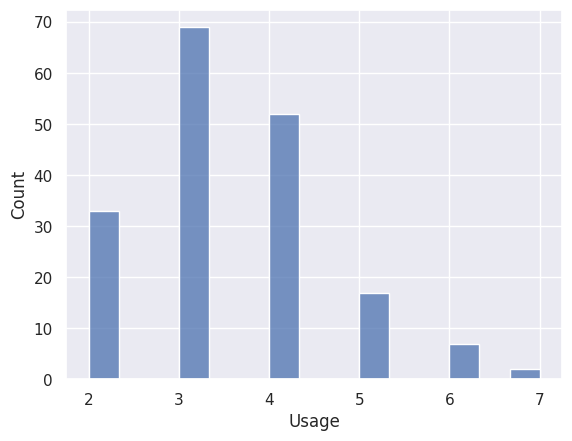

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Use histplot instead of distplot
sns.histplot(aerofit_data['Usage'], kde=False)
plt.show()


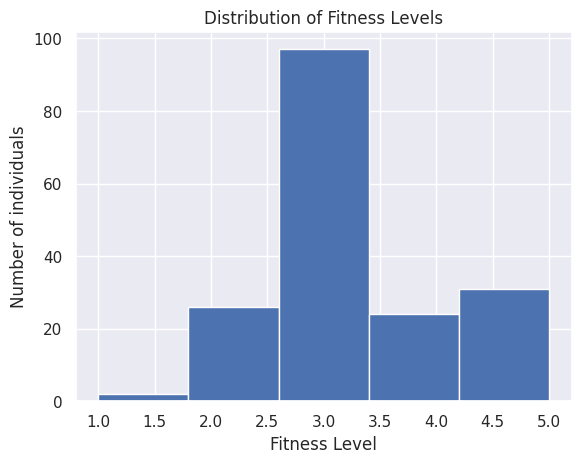

In [15]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(aerofit_data['Fitness'], bins=5)

# Add labels and title
plt.xlabel("Fitness Level")  # Label for the x-axis
plt.ylabel("Number of individuals")  # Label for the y-axis
plt.title("Distribution of Fitness Levels")  # Title for the plot

# Display the plot
plt.show()

Count Plot:


<ipython-input-29-28b4e7cce574>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=aerofit_data, palette="Blues_d")


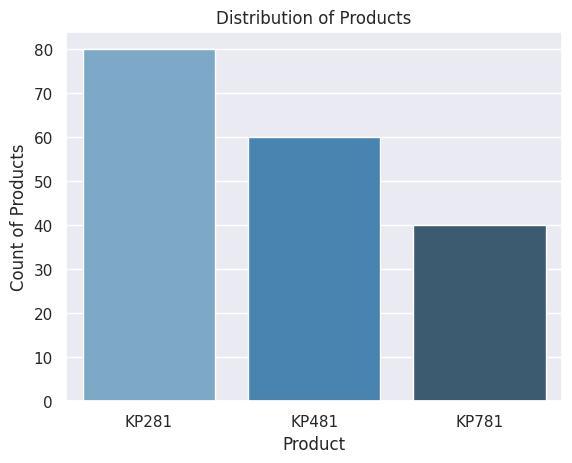

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Count Plot:")
sns.countplot(x='Product', data=aerofit_data, palette="Blues_d")

# Add labels and title
plt.xlabel("Product")  # Label for the x-axis
plt.ylabel("Count of Products")  # Label for the y-axis
plt.title("Distribution of Products")  # Title for the plot

# Display the plot
plt.show()

Product vs Gender:


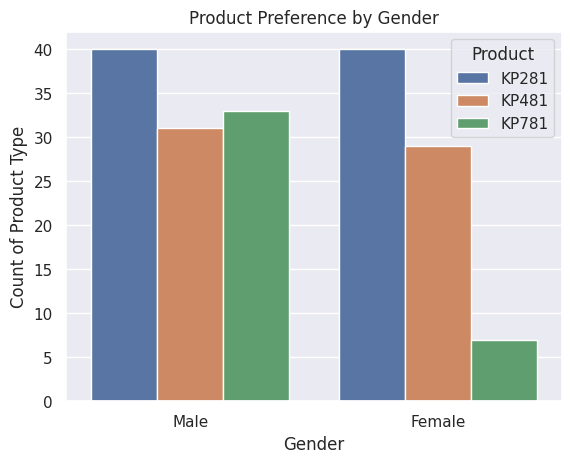

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Product vs Gender:")
sns.countplot(x='Gender', hue='Product', data=aerofit_data)

# Add labels and title
plt.xlabel("Gender")  # Label for the x-axis
plt.ylabel("Count of Product Type")  # Label for the y-axis
plt.title("Product Preference by Gender")  # Title for the plot

# Display the plot
plt.show()

Product vs Marital Status:


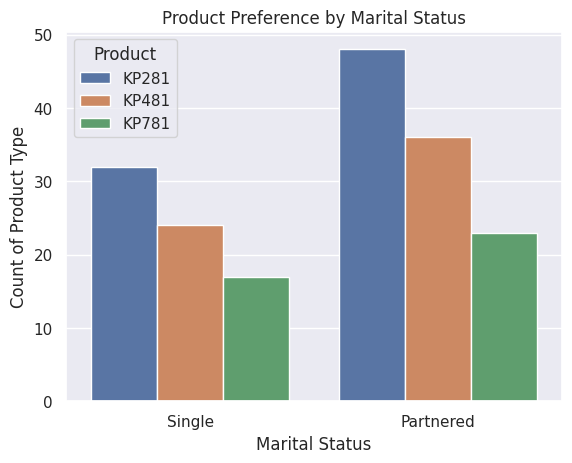

In [31]:
print("Product vs Marital Status:")
sns.countplot(x='MaritalStatus', hue='Product', data=aerofit_data)  # Changed 'Marital Status' to 'MaritalStatus'

# Add labels and title
plt.xlabel("Marital Status")  # Label for the x-axis
plt.ylabel("Count of Product Type")  # Label for the y-axis
plt.title("Product Preference by Marital Status")  # Title for the plot

# Display the plot
plt.show()

Product vs Age (Binned):


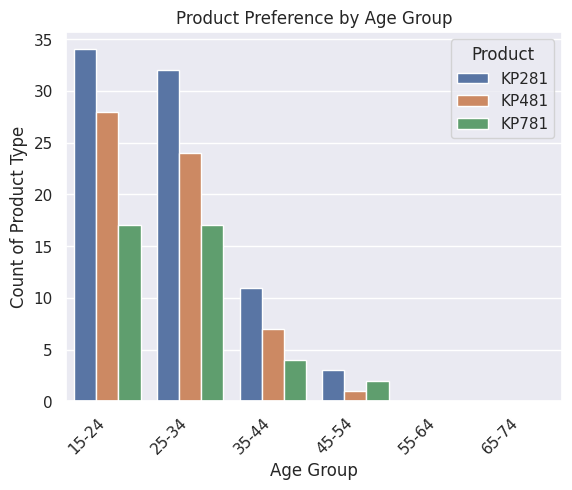

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("Product vs Age (Binned):")

   # Create age bins (adjust ranges as needed)
aerofit_data['Age_Group'] = pd.cut(aerofit_data['Age'], bins=[15, 25, 35, 45, 55, 65, 75],
                                      labels=['15-24', '25-34', '35-44', '45-54', '55-64', '65-74'])

sns.countplot(x='Age_Group', hue='Product', data=aerofit_data)

   # Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Count of Product Type")
plt.title("Product Preference by Age Group")

   # Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.show()

Correlation Matrix:


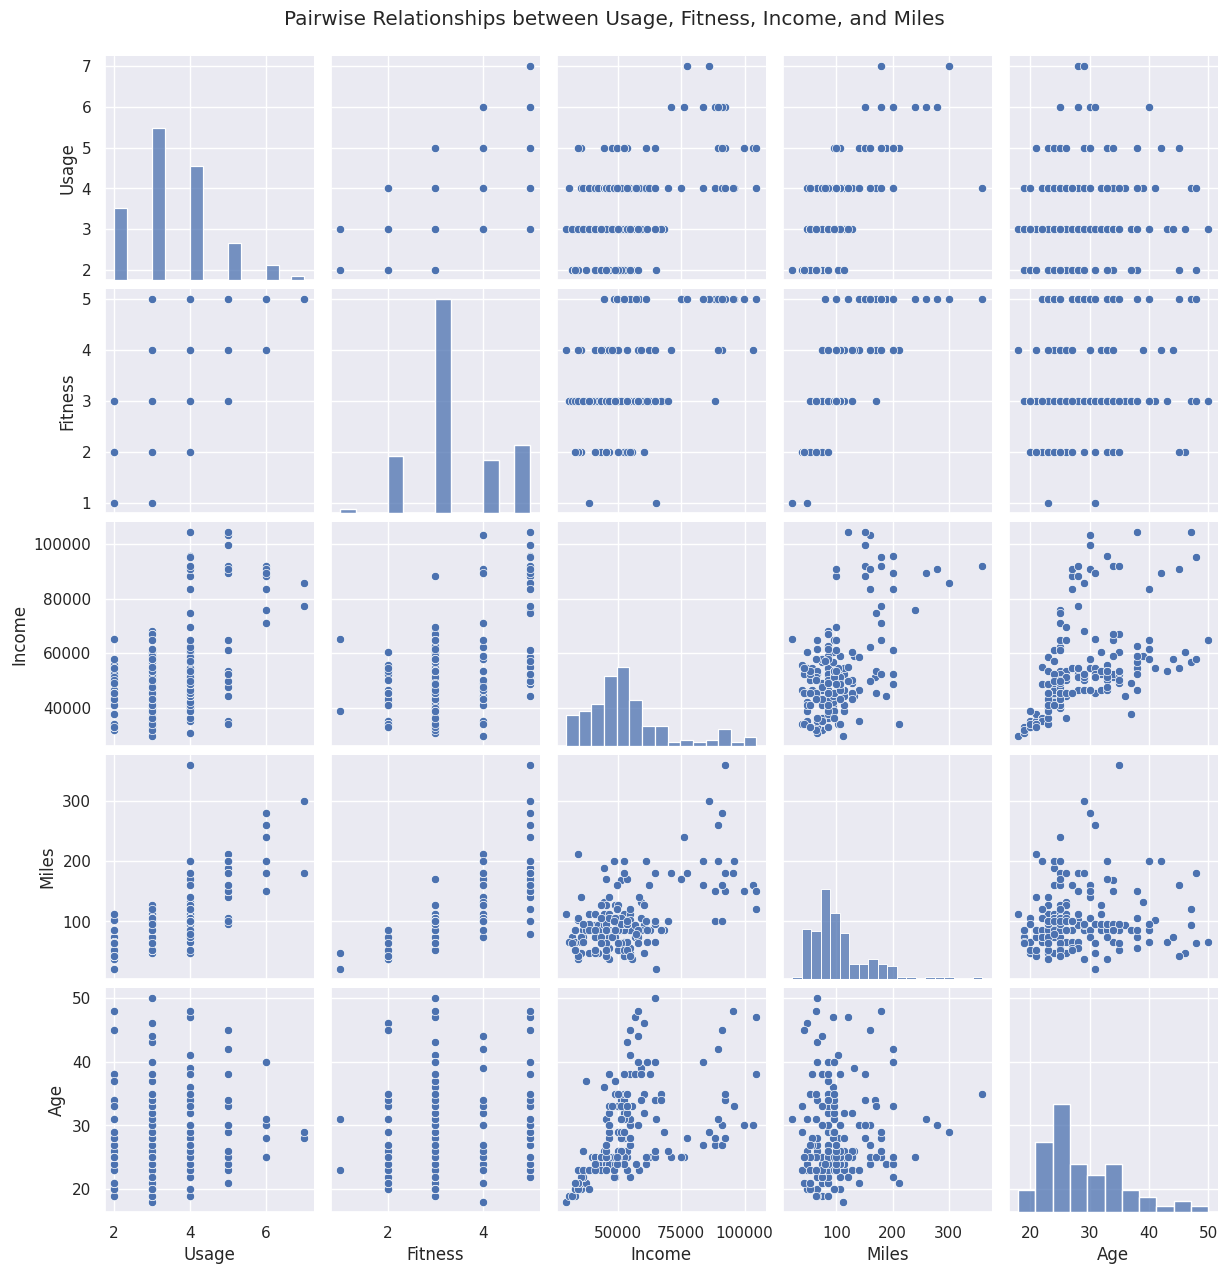

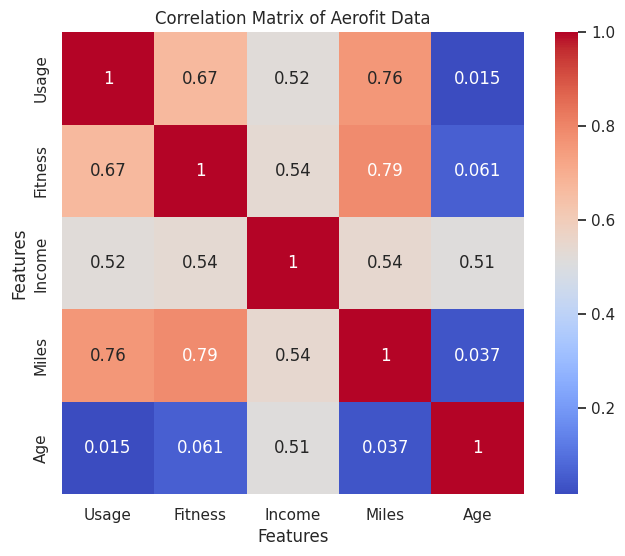

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# Select only numerical features for pairplot and correlation
numerical_features = ['Usage', 'Fitness', 'Income', 'Miles', 'Age']
sns.pairplot(aerofit_data[numerical_features]) # Use numerical_features for pairplot

# Add a title to the pairplot (optional)
plt.suptitle("Pairwise Relationships between Usage, Fitness, Income, and Miles", y=1.02)

print("Correlation Matrix:")
corr_matrix = aerofit_data[numerical_features].corr() # Use numerical_features for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title and labels to the heatmap
plt.title("Correlation Matrix of Aerofit Data")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()